# Predicting Gender by Voice - Random Forest

### Today we will create a random forest model that is able to predict whether a voice is male or female. <br>
The random forest model creates a 'forest' of decision trees. These decision trees are all given a randomly selected portion of the features that we define beforehand. We do not know what tree will get what part or combination of the feature set. Which is why a random forest is seen as a black box model.

In [31]:
import sklearn as sk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

Our first step is looking at the data we have at hand. What are we working with? <br>
We can already see that we currently have too many variables, we will have to subset our dataset into relevant variables. <br>
We will also clean up our data bit and create a plot matrix to get insights on the relation between these variables.

In [32]:
df = pd.read_csv('voice.csv')

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Before we pick our variables, we create a quick correlation table. This will show us exactly the correlation between variables. We try to pick the best fitting ones. However, we make sure to not pick variables which are too similar to each other. In order to do this correctly, we will first transform the 'label' into dummy variables. The computer does not recognize 'male' or 'female', but it does recognize 0 or 1!


In [33]:
df = pd.get_dummies(df, columns=['label'])
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_female,label_male
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,-0.479539,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,0.283919,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,0.511455,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,-0.066906,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,-0.618916,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,-0.036627,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,-0.087195,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,-0.490552,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,-0.357499,0.357499


Next up is subsetting our dataset into a smaller, relevant dataset. <br>
We pick our variables according to their correlation with our Y (label). The strongest seven variables are used in our model.

In [34]:
df_voice = df[['sd','Q25','IQR', 'centroid', 'meanfun', 'sp.ent', 'sfm','label_female']]
df_voice = df_voice.dropna(axis=0)
df_voice.head()

,sd,Q25,IQR,centroid,meanfun,sp.ent,sfm,label_female
0,0.064241,0.015071,0.075122,0.059781,0.084279,0.893369,0.491918,0
1,0.067310,0.019414,0.073252,0.066009,0.107937,0.892193,0.513724,0
2,0.083829,0.008701,0.123207,0.077316,0.098706,0.846389,0.478905,0
3,0.072111,0.096582,0.111374,0.151228,0.088965,0.963322,0.727232,0
4,0.079146,0.078720,0.127325,0.135120,0.106398,0.971955,0.783568,0


To see whether we have to transform any variables, we create a plot matrix

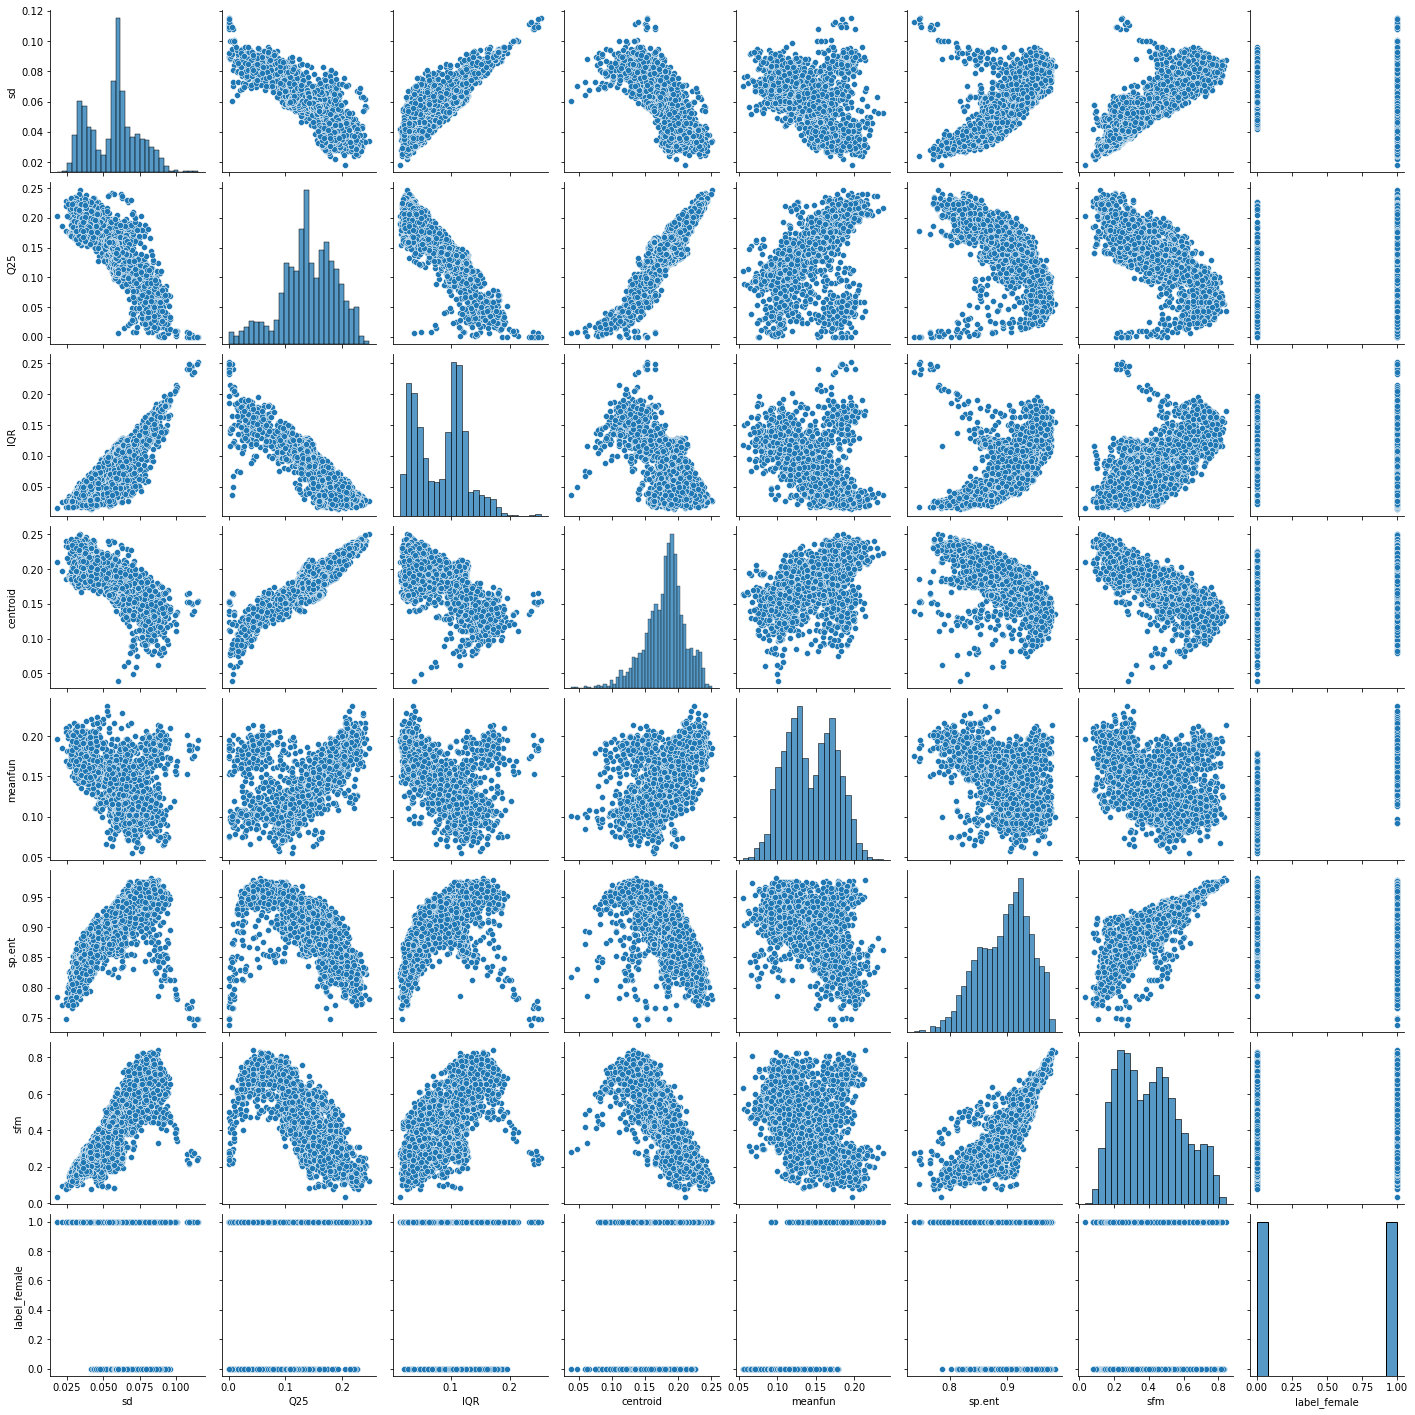

In [35]:
sns.pairplot(df_voice)
plt.show()

### Transforming our variables. <br>
With the help of the pairplot we can identify which variables have to be transformed to log variables. It will make our data even cleaner and easier to work with for the model. (Strange that there is no visible change, was transforming to log necessary? Additionallly, should a variable only be log transformed when there is a clear skew in the normal graphic? -> such as the centroid, sp.ent and sfm in this case)<br>
Edit: The choice was made to not log transform 'centroid' as the logarithmic centroid was even more skewed.

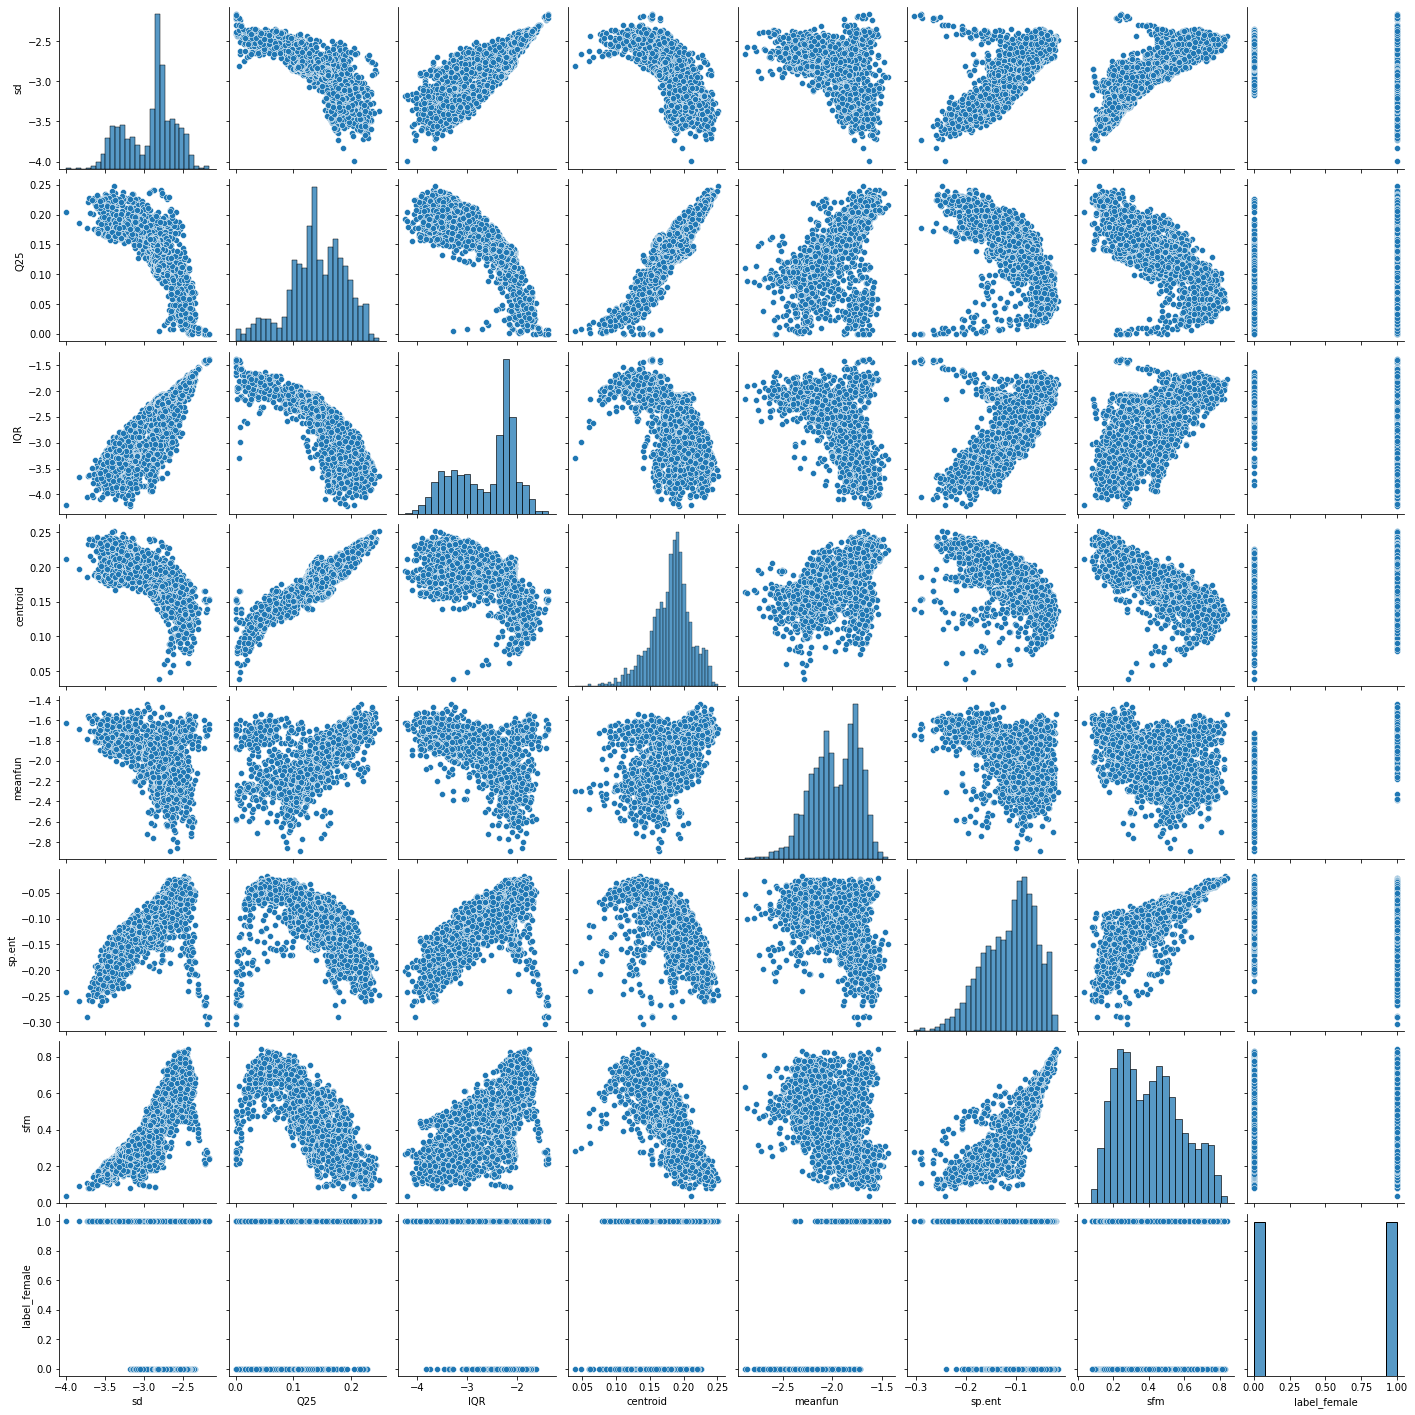

In [36]:
df_voice[['sd', 'IQR', 'meanfun', 'sp.ent']] = np.log(df_voice[['sd','IQR', 'meanfun', 'sp.ent']])
sns.pairplot(df_voice)
plt.show()

In [37]:
df_voice.head()

,sd,Q25,IQR,centroid,meanfun,sp.ent,sfm,label_female
0,-2.745109,0.015071,-2.588642,0.059781,-2.473621,-0.112755,0.491918,0
1,-2.698446,0.019414,-2.613845,0.066009,-2.226212,-0.114073,0.513724,0
2,-2.478971,0.008701,-2.093890,0.077316,-2.315607,-0.166776,0.478905,0
3,-2.629554,0.096582,-2.194866,0.151228,-2.419514,-0.037367,0.727232,0
4,-2.536460,0.078720,-2.061015,0.135120,-2.240570,-0.028446,0.783568,0


In [38]:
X = df_voice.loc[:,'sd':'sfm'] #This gets all the columns from Time to Amount
y = df_voice['label_female']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
rf = RandomForestClassifier(random_state = 1, n_estimators = 100)
rf = rf.fit(X, y)
y_test_p = rf.predict(X_test)
a_s = accuracy_score(y_test, y_test_p)
print(a_s)

1.0


In [41]:
msre = mean_squared_error(y_test, y_test_p)
print(msre)

0.0


When eveluating the model, it seems (weirdly enough) to be as close to 100% accurate as it can be. <br>
The score could be correct, when we take a look at the Kaggle page it tells us that a random forest model is one of the most accurate models for the current data.

In [43]:
cm = confusion_matrix(y_test, y_test_p)
cm = pd.DataFrame(cm, index=['Female (actual)', 'Male (actual)'], columns=['Female (predict)', 'Male (predict)'])
cm

,Female (predict),Male (predict)
Female (actual),494,0
Male (actual),0,457


I got the feeling something strange is going on with the model, but I do not know what exactly. If the model is 100% accurate, the confusion matrix would make sense. 